In [19]:

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
"""Import modules required to run the Jupyter notebook."""
# Clear logger to use tiatoolbox.logger
import logging

if logging.getLogger().hasHandlers():
    logging.getLogger().handlers.clear()

# Pretty print for nice dictionary printing
from pprint import pprint
import matplotlib as mpl
import matplotlib.pyplot as plt

from tiatoolbox import logger
from tiatoolbox.data import small_svs
from tiatoolbox.wsicore.wsireader import WSIReader

mpl.rcParams["figure.dpi"] = 150  # for high resolution figure in notebook
mpl.rcParams["figure.facecolor"] = "white"  # To make sure text is visible in dark mode
plt.rcParams.update({"font.size": 5})
import imageio
import cv2
import numpy as np
import os

main_path = "/mnt/cephfs/home/users/fshahi/sharedscratch/Projects/Histomorphological-Phenotype-Learning"
wsi_path = "{}/datasets/TCGA_MESO/e1941daa-725f-4ef5-ae2a-de4d68a5a5c2".format(main_path)

In [20]:
# get a list of all the files in the directory
img_list = os.listdir(wsi_path)
img_list = [os.path.join(wsi_path, f) for f in img_list]
img_list = [f for f in img_list if f.endswith('.svs')]
img_list

['/mnt/cephfs/home/users/fshahi/sharedscratch/Projects/Histomorphological-Phenotype-Learning/datasets/TCGA_MESO/e1941daa-725f-4ef5-ae2a-de4d68a5a5c2/TCGA-SC-A6LP-01Z-00-DX1.F0FFC261-1A10-4B09-84BD-6C056C9B9262.svs']

In [21]:
reader = WSIReader.open(img_list[0])
info_dict = reader.info.as_dict()
pprint(info_dict)

{'axes': 'YXS',
 'file_path': PosixPath('/mnt/cephfs/home/users/fshahi/sharedscratch/Projects/Histomorphological-Phenotype-Learning/datasets/TCGA_MESO/e1941daa-725f-4ef5-ae2a-de4d68a5a5c2/TCGA-SC-A6LP-01Z-00-DX1.F0FFC261-1A10-4B09-84BD-6C056C9B9262.svs'),
 'level_count': 4,
 'level_dimensions': ((83958, 40340),
                      (20989, 10085),
                      (5247, 2521),
                      (2623, 1260)),
 'level_downsamples': [1.0,
                       4.0000476440040025,
                       16.00136509126652,
                       32.012130179305174],
 'mpp': (0.5015, 0.5015),
 'objective_power': 20.0,
 'slide_dimensions': (83958, 40340),
 'vendor': 'aperio'}


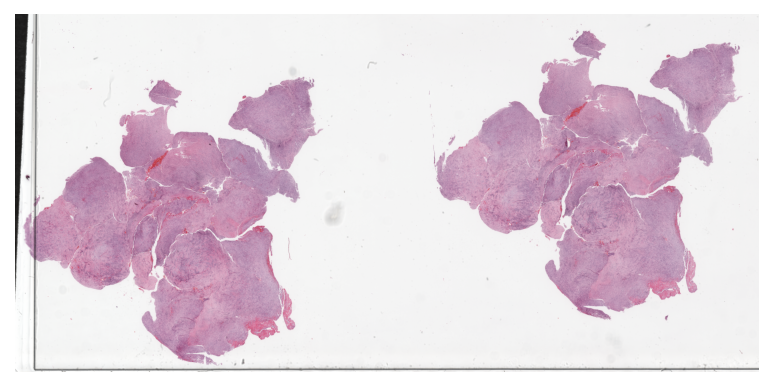

In [22]:
thumbnail = reader.slide_thumbnail(resolution=1.8)
plt.imshow(thumbnail)
plt.axis("off")
plt.show()

(x, y) tuple giving the top left pixel in the baseline (level 0) reference frame, and size as (width, height) tuple giving the desired output image size.

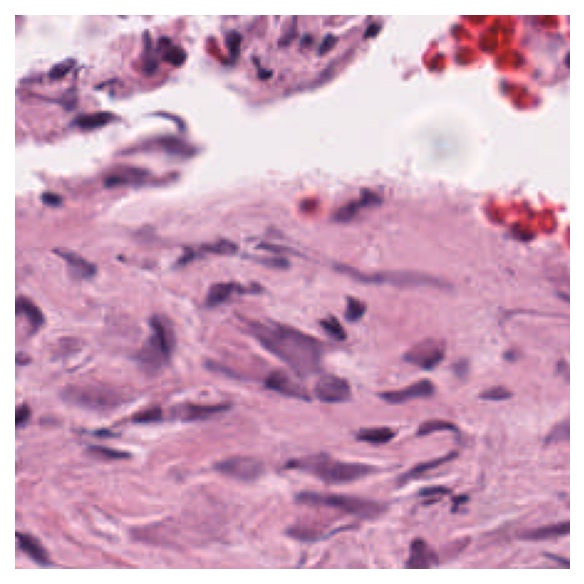

In [83]:
location = (20989, 20170)
# location = (10000, 10000)
size = (224, 224)


img = reader.read_rect(
    location,
    size,
    resolution=20,
    units="power",
)

plt.imshow(img)
plt.axis("off")
plt.show()

stdBkg:  43.015984569847426
avgBkg:  167.2626953125
stdBkg:  124.32022690880308
avgBkg:  99.20280612244898
Background percentage: 12.97%


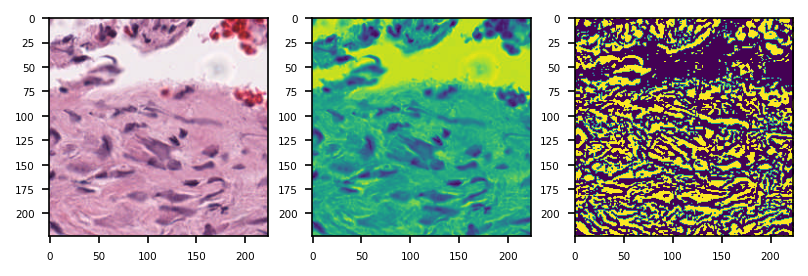

In [93]:
def calculate_background_percentage(tile):
    """Calculate the percentage of background pixels in a tile."""
    avgBkg = np.mean(tile)
    stdBkg = np.std(tile)
    print("stdBkg: ", stdBkg)
    print("avgBkg: ", avgBkg)
    plt.grid(False)
    plt.subplot(131)
    plt.imshow(tile)
    # Convert the tile to grayscale
    gray_tile = cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY)
    # Calculate the average background color
    avgBkg = np.mean(gray_tile)
    stdBkg = np.std(gray_tile)
    print("stdBkg: ", stdBkg)
    print("avgBkg: ", avgBkg)
    plt.subplot(132)
    plt.imshow(gray_tile)


    # Threshold the grayscale tile to detect background
    binary_tile = cv2.adaptiveThreshold(gray_tile, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    avgBkg = np.mean(binary_tile)
    stdBkg = np.std(binary_tile)
    print("stdBkg: ", stdBkg)
    print("avgBkg: ", avgBkg)
    plt.subplot(133)
    plt.imshow(binary_tile)

    # Calculate the percentage of background pixels
    total_pixels = tile.size
    background_pixels = cv2.countNonZero(binary_tile)
    background_percentage = (background_pixels / total_pixels) * 100

    return background_percentage

tile = img
background_percentage = calculate_background_percentage(tile)
print("Background percentage: {:.2f}%".format(background_percentage))


Background percentage: 12.97%


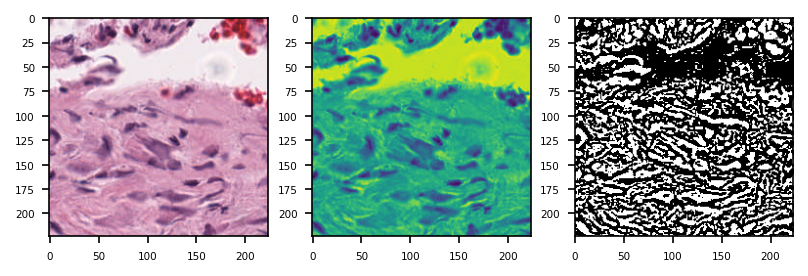

In [ ]:
tile_generator = TilePyramidGenerator(wsi=wsi,tile_size=1080)
print(tile_generator.level_count)

tile_0_0 = tile_generator.get_tile(level=1, x=0, y=0)
tile_0_0.save(os.path.join(os.getcwd(), "tile_0_0.png"))

location = (0, 0)
size = (256, 256)
# Read a region at level 0 (baseline / full resolution)
img = wsi.read_rect(location, size)
# Read a region at 0.5 microns per pixel (mpp)
img = wsi.read_rect(location, size, 0.5, "mpp")
# This could also be written more verbosely as follows
img = wsi.read_rect(location, size, resolution=(0.5, 0.5), units="mpp")
imageio.imwrite(os.path.join(os.getcwd(), "tile_0_0_0.5mpp.png"), img)